<a href="https://colab.research.google.com/github/PyBeginner1/GoldPricePrediction/blob/main/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#metrics is used for evalutaion, to measure the accuracy score
from sklearn import metrics 


In [4]:
from google.colab import files
uploaded = files.upload()

Saving gld_price_data.csv to gld_price_data.csv


In [5]:
df = pd.read_csv("gld_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
df.tail()


,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


Start from 2008 to 2018. 10 year dataset


In [8]:
#find the number of rows & columns
df.shape

(2290, 6)

In [10]:
#getting info abot data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
#checking null
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [14]:
#statistical measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Finding correlation between Columns in our Database


Two Types - Positive Correlation, Negative Correlation.

In [15]:
correlation = df.corr()

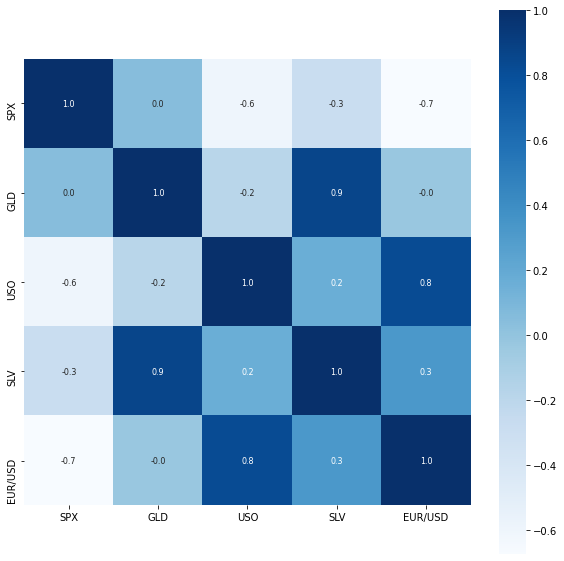

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt ='.1f', annot = True, cmap = 'Blues',  annot_kws = {'size': 8})

Correlation Values of Gold-->GLD

In [34]:
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


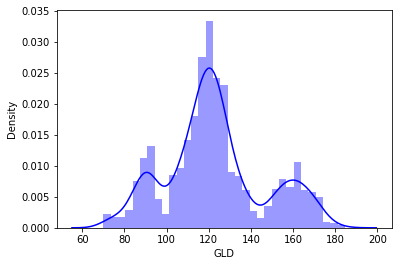

In [38]:
#checking the distribution of gold price
sns.distplot(df["GLD"], color = 'blue')

Splitting the Features(other stock prices) & Target(GLD prices)

X = Other Stock Prices & Y= Gold Prices

In [42]:
X = df.drop(['Date','GLD'], axis = 1)   #axis = 1 when dropping cols & axis = 0 when dropping rows
Y = df["GLD"]

In [40]:
X.columns

Index(['SPX', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [45]:
print(X)


              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [46]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Train & Test data

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

Model is Random Forest Regressor - Consists of various decision tree & the result is finalized based on majority/voting system

In [48]:
regressor = RandomForestRegressor(n_estimators= 100)

In [49]:
#Train the model
regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

**Model Evaluation**

In [50]:
#Prediction on test data
test_data_predict = regressor.predict(X_test)

In [51]:
print(test_data_predict)

[168.5159992   82.02339986 115.99980019 127.7760008  120.87830089
 154.74759747 150.56799922 126.18990052 117.3817989  126.00400077
 116.59970107 171.59760067 141.66969883 167.89219818 115.10189992
 117.77580064 140.03700272 169.77280065 160.14350318 157.63409871
 155.15920023 125.19490012 176.05410013 157.49180391 125.19690038
  94.02699943  77.54870008 120.60659975 119.02009902 167.3722
  88.44920053 125.32419948  91.18190075 117.75090007 121.18909859
 136.5012009  115.61610121 115.00400093 146.73319965 107.15080098
 104.74740259  87.11399784 126.55930031 117.90540015 153.43859928
 119.70760025 108.40039973 108.38889869  93.24040059 127.08579756
  74.86590028 113.62529946 121.21250011 111.31059889 118.94399913
 120.54269915 160.50419991 169.05070099 147.04819667  85.92499866
  94.1645002   86.76699858  90.56610022 119.0324006  126.46320083
 127.50990012 170.53529994 122.25739937 117.21739911  98.3836002
 168.19710176 142.84759817 131.9100025  121.27980233 121.02229941
 119.58700077 1

Now Compare the predicted values with real values

In [55]:
#metrics - R squared error
error = metrics.r2_score(Y_test,test_data_predict )

In [56]:
print("R2 Error :", error)

R2 Error : 0.989129962847191


In [57]:
Y_test = list(Y_test)

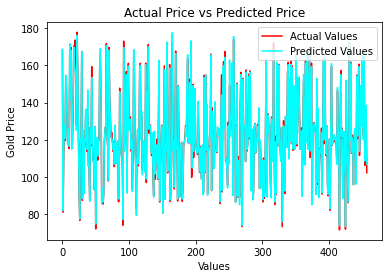

In [70]:
plt.plot(Y_test, color = 'red', label ="Actual Values")
plt.plot(test_data_predict, color ='cyan', label = "Predicted Values")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Values")
plt.ylabel("Gold Price")
plt.legend(loc ='upper right')
